In [2]:
#Task 1: Data overview
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('/content/Data_set 2 - Copy.csv')

In [4]:
df.head()

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,34,Yes,1,2,5,3,7,6,4,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
1,Female,23,Yes,4,3,2,1,5,6,7,...,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
2,Male,30,Yes,3,6,4,2,5,1,7,...,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
3,Male,22,Yes,2,1,3,7,6,4,5,...,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
4,Female,24,No,2,1,3,6,4,5,7,...,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   gender                             40 non-null     object
 1   age                                40 non-null     int64 
 2   Investment_Avenues                 40 non-null     object
 3   Mutual_Funds                       40 non-null     int64 
 4   Equity_Market                      40 non-null     int64 
 5   Debentures                         40 non-null     int64 
 6   Government_Bonds                   40 non-null     int64 
 7   Fixed_Deposits                     40 non-null     int64 
 8   PPF                                40 non-null     int64 
 9   Gold                               40 non-null     int64 
 10  Stock_Marktet                      40 non-null     object
 11  Factor                             40 non-null     object
 12  Objective 

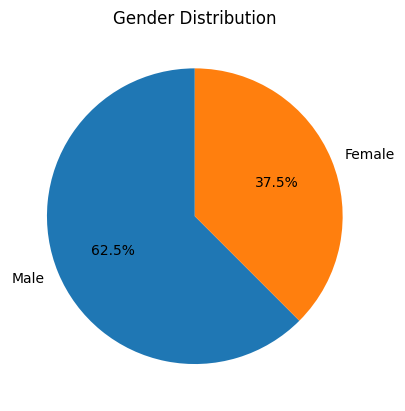

In [6]:
#Task2: Gender Distribution
gender_counts = df['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

In [7]:
#Task3: Descriptive Statistics
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
print(numerical_cols)

['age', 'Mutual_Funds', 'Equity_Market', 'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold']


In [8]:
mean = df[numerical_cols].mean()
median = df[numerical_cols].median()
standard_deviation = df[numerical_cols].std()

print("Mean:\n", mean)
print("\nMedian:\n", median)
print("\nStandard Deviation:\n", standard_deviation)

Mean:
 age                 27.800
Mutual_Funds         2.550
Equity_Market        3.475
Debentures           5.750
Government_Bonds     4.650
Fixed_Deposits       3.575
PPF                  2.025
Gold                 5.975
dtype: float64

Median:
 age                 27.0
Mutual_Funds         2.0
Equity_Market        4.0
Debentures           6.5
Government_Bonds     5.0
Fixed_Deposits       3.5
PPF                  1.0
Gold                 6.0
dtype: float64

Standard Deviation:
 age                 3.560467
Mutual_Funds        1.197219
Equity_Market       1.131994
Debentures          1.675617
Government_Bonds    1.369072
Fixed_Deposits      1.795828
PPF                 1.609069
Gold                1.143263
dtype: float64


In [9]:
#Task4: Most preferred investment avenue
investment_avenue_counts = df['Investment_Avenues'].value_counts()
most_frequent_avenue = investment_avenue_counts.idxmax()
print("Frequency Analysis of Investment Avenues:")
print(investment_avenue_counts)
print("\nMost Frequent Investment Avenue:", most_frequent_avenue)

Frequency Analysis of Investment Avenues:
Investment_Avenues
Yes    37
No      3
Name: count, dtype: int64

Most Frequent Investment Avenue: Yes


In [11]:
#Task5: Reasons for investment
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')


def summarize_reasons(df, column_names=['Reason_Equity','Reason_Mutual','Reason_Bonds','Reason_FD']):

    all_reasons_text = ""
    for column_name in column_names:
        all_reasons_text += " ".join(df[column_name].astype(str).tolist())

    tokens = word_tokenize(all_reasons_text.lower())
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [w for w in tokens if w.isalnum() and w not in stop_words]
    word_frequencies = Counter(filtered_tokens)
    return word_frequencies

word_frequencies = summarize_reasons(df)

print("Common Themes/Recurring Reasons:")
for word, frequency in word_frequencies.most_common(10):
    print(f"{word}: {frequency}")

Common Themes/Recurring Reasons:
returns: 67
capital: 30
appreciation: 30
assured: 26
better: 23
risk: 19
free: 19
fixed: 17
fund: 13
diversification: 13


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
#Task6: Savings Objectives
def savings_objectives(df, column_name='What are your savings objectives?'):

    objective_counts = df[column_name].value_counts().to_dict()
    objective_summary = {}
    for objective, count in objective_counts.items():
        objective_summary[objective] = {
            'frequency': count,
            'description': f"This objective focuses on {objective.lower()}"

        }

    return objective_summary

savings_summary = savings_objectives(df)

print("Savings Objectives Summary:")
for objective, details in savings_summary.items():
    print(f"- {objective}:")
    print(f"  Frequency: {details['frequency']}")
    print(f"  Description: {details['description']}")

Savings Objectives Summary:
- Retirement Plan:
  Frequency: 24
  Description: This objective focuses on retirement plan
- Health Care:
  Frequency: 13
  Description: This objective focuses on health care
- Education:
  Frequency: 3
  Description: This objective focuses on education


In [13]:
#Task7: Common information sources
def sources(df, column_name='Source'):

    information_sources = df[column_name].str.split(';')
    all_sources = [source.strip() for sublist in sources for source in sublist if source.strip()]
    source_frequencies = pd.Series(all_sources).value_counts()

    return source_frequencies

source_frequencies = sources(df)

print("Most Common Information Sources:")
print(source_frequencies.head(10))

Most Common Information Sources:
Financial Consultants       16
Newspapers and Magazines    14
Television                   6
Internet                     4
Name: count, dtype: int64


In [14]:
#Task8: Investment duration
def average_duration(df, column_name='Duration'):

    try:
        durations = pd.to_numeric(df[column_name])
    except ValueError:
        durations = df[column_name].str.extract('(\d+)').astype(float)
    average_duration = np.mean(durations)
    return average_duration

average_duration = average_duration(df)

print(f"Average Investment Duration: {average_duration}")

Average Investment Duration: 2.05


In [15]:
#Task9: Expectations from investments
def expectations(df, column_name='Expect'):
    all_expectations_text = " ".join(df[column_name].astype(str).tolist())
    tokens = word_tokenize(all_expectations_text.lower())
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [w for w in tokens if w.isalnum() and w not in stop_words]

    word_frequencies = Counter(filtered_tokens)

    return word_frequencies


expectations_frequencies = expectations(df)

print("Common Expectations:")
for word, frequency in expectations_frequencies.most_common(10):
    print(f"- {word}: {frequency}")

Common Expectations:
- 20: 32
- 30: 5
- 10: 3


In [26]:
#Task10: Correlation analysis
def correlations(df, columns=['age', 'Duration', 'Expect']):

    subset_df = df[columns]
    if subset_df['Duration'].dtype == object:
        def extract_avg(range_str):
            try:
                lower, upper = map(float, range_str.replace('%', '').split('-'))
                return (lower + upper) / 2
            except ValueError:
                try:
                    return float(range_str.replace('%', ''))
                except ValueError:
                    return float('nan')

        subset_df['Duration'] = subset_df['Duration'].apply(extract_avg_from_range)

    correlation_matrix = subset_df.corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()

    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            plt.figure(figsize=(6, 4))
            plt.scatter(subset_df[columns[i]], subset_df[columns[j]])
            plt.xlabel(columns[i])
            plt.ylabel(columns[j])
            plt.title(f"Scatter Plot: {columns[i]} vs. {columns[j]}")
            plt.show()
